# CH05. 이산형 확률분포

# 5.1 **1차원 이산형 확률변수**


In [1]:
# 라이브러리: NumPy(수식), Matplotlib(그림)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

## 5.1.1 **1차원 이산형 확률변수의 정의**

용어정리

## **Random Variable (확률변수)**

확률변수는 함수(function)입니다. 

즉, 표본공간(sample space)에 있는 원소를 실수로 대응시키는 함수입니다. 



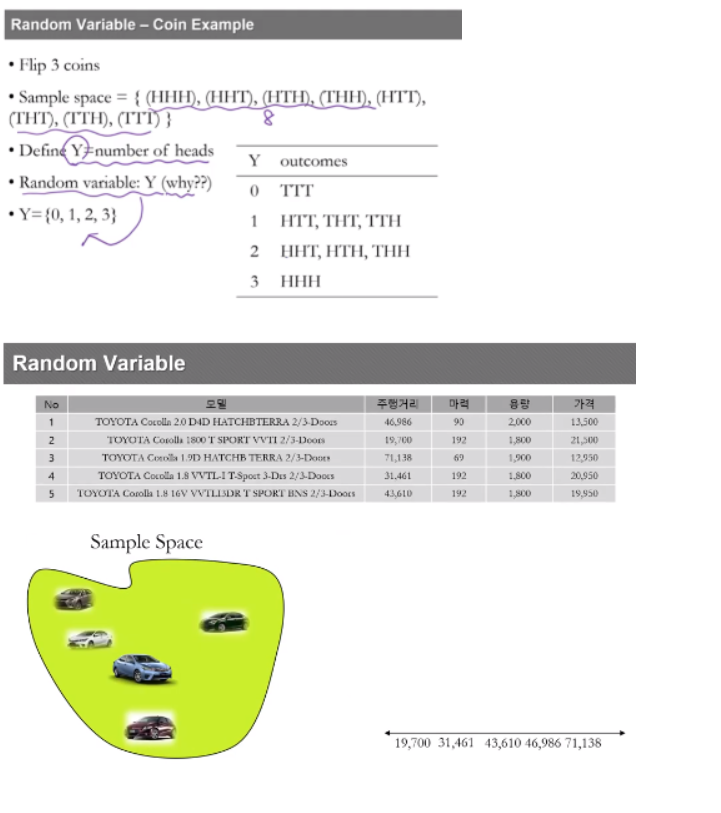

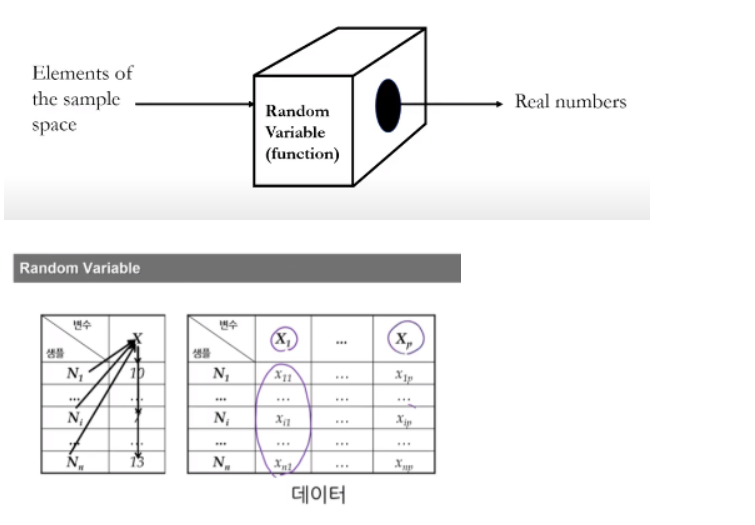

- 확률변수
  - 이산형(Discreate ~, countable)

    ex) 코로나19 확진자 수, 주사위 값
  - 연속형(Continuous ~, uncountable)

    ex) 18홀 골프 치는 데 걸리는 시간, 서울시민 연소득



## Probability Function (확률함수)




- 0~1 값
- 모든 p의 합 = 1

확률변수에도 이산형과 연속형이 있었던 것처럼
**확률함수**에도 두 가지로 나뉩니다.


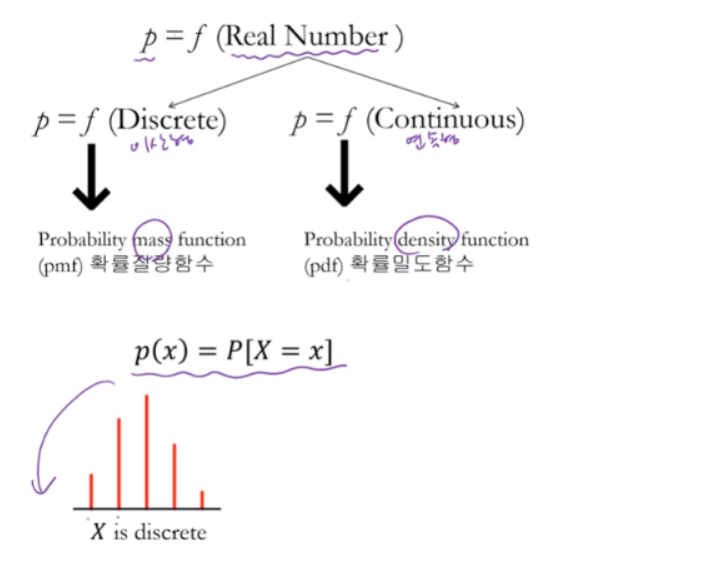

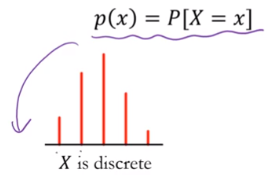


probability mass function = PMF

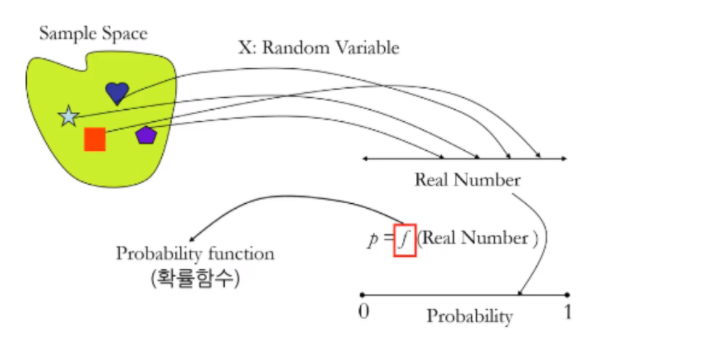

**실행** (p.116)

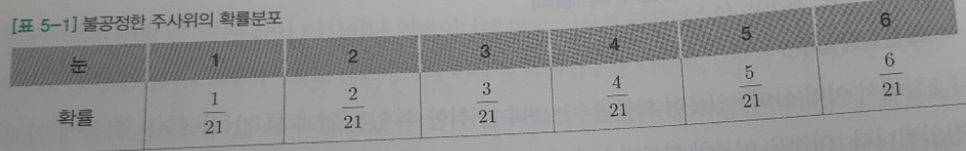

불공정한 주사위의 확률변수를 파이썬으로 구현해봅시다.

In [3]:
x_set = np.array([1,2,3,4,5,6])

In [4]:
x_set

array([1, 2, 3, 4, 5, 6])

In [5]:
def f(x):                 # 확률을 반환하는 함수
    if x in x_set:
        return x / 21
    else:
        return 0

In [6]:
X = [x_set, f]            # 확률변수 X 정의

In [7]:
[f(x_k) for x_k in x_set] # 앞에 정의한 def f(x)에 인수인 x_k를 넣어줌

[0.047619047619047616,
 0.09523809523809523,
 0.14285714285714285,
 0.19047619047619047,
 0.23809523809523808,
 0.2857142857142857]

In [8]:
np.array([f(x_k) for x_k in x_set])

array([0.048, 0.095, 0.143, 0.19 , 0.238, 0.286])

In [9]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set]) # 식에 대한 설명 앞에 정의한 def f(x)
# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

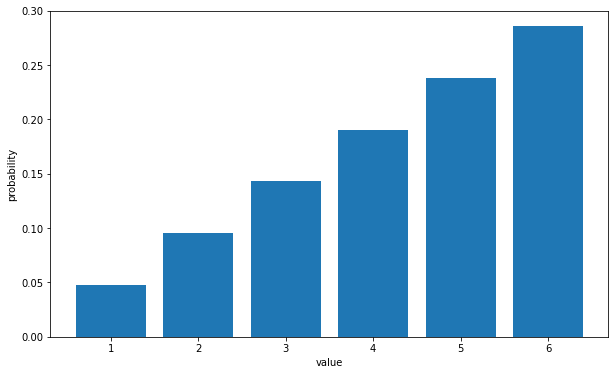

In [10]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

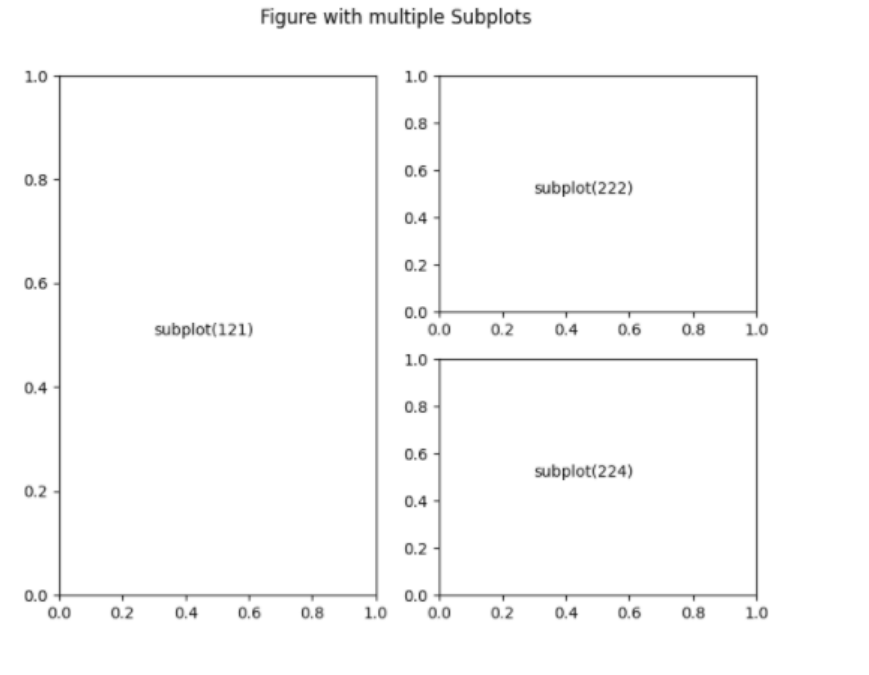

- 확률의 성질 

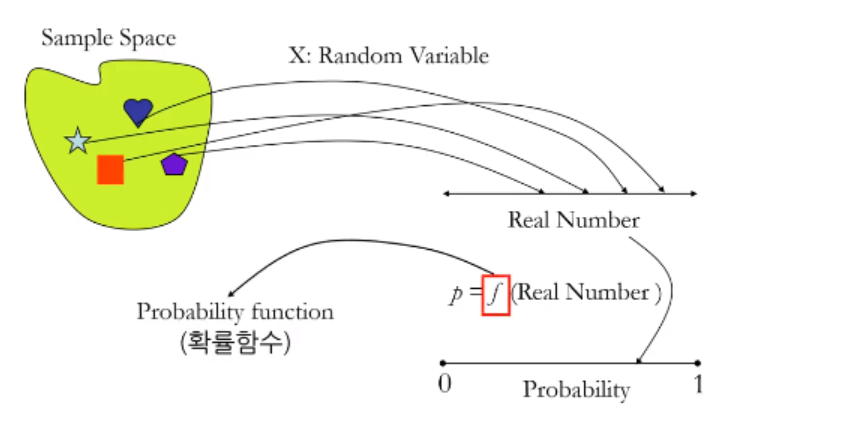

In [11]:
np.all(prob >= 0)

True

In [12]:
np.sum(prob)

0.9999999999999999

- 누적분포함수 (p.120)

In [13]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [14]:
F(3)

0.2857142857142857

- 확률변수의 변환과 확률분포(p.121)

    주사위 X -> 2X + 3 

    - X : {1,2,3,4,5,6}
    - Y = 2X + 3
    - Y : {5,7,9,11,13,15}
    

    (확률변수의 표준화: 평균 빼고 표준편차로 나눌 때 중요한 연산)


In [15]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))
# 변환 후도 확률변수, X_k의 확률과 Y_k의 확률이 같다. 

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

- 확률변수 - 이산형, 연속형
- 확률함수 - 이산형(PMF), 연속형(PDF)
- 확률분포
- 확률의 성질 
- 누적분포함수
- 확률변수의 변환

## 5.1.2 **1차원 이산형 확률변수의 지표**

- 기댓값
  (확률변수의 평균, 뮤, E(X))

  ex) 주사위 무제한 던진 값의 합 / 무제한의 갯수
  
  ex) 40(6), 50(8), 60(6)


In [16]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [17]:
sample = np.random.choice(x_set, int(1e6), p=prob) #prob = np.array([f(x_k) for x_k in x_set])
np.mean(sample)

4.333668

- 변환한 확률변수의 기댓값

변환한 확률변수의 기댓값은 (2x+3) * f(x_k)의 총합으로 생각하면 된다.

In [18]:
def E(X, g=lambda x: x):
    x_set, f = X            # 이걸 왜 넣어놓은 거지? 
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [19]:
E(X)

4.333333333333333

In [20]:
E(X, g=lambda x: 2*x + 3)

11.666666666666664

In [21]:
2 * E(X) + 3

11.666666666666666

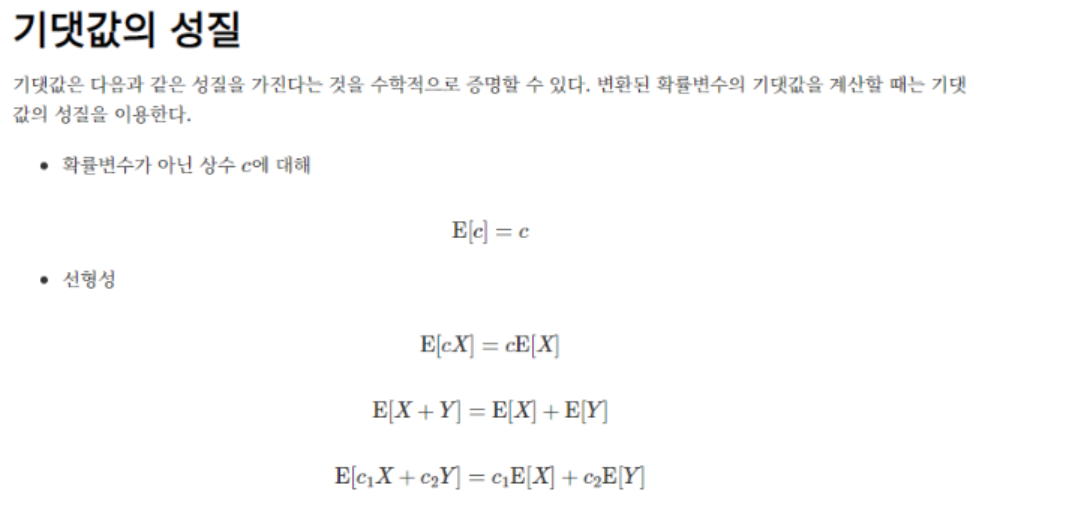

- 분산

분산은 우리가 원래 알고 있던 것처럼 편차 제곱의 기댓값이 된다.

In [22]:
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [23]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [24]:
V(X)

2.2222222222222223

In [25]:
V(X, lambda x: 2*x + 3)

8.88888888888889

In [26]:
2**2 * V(X)

8.88888888888889

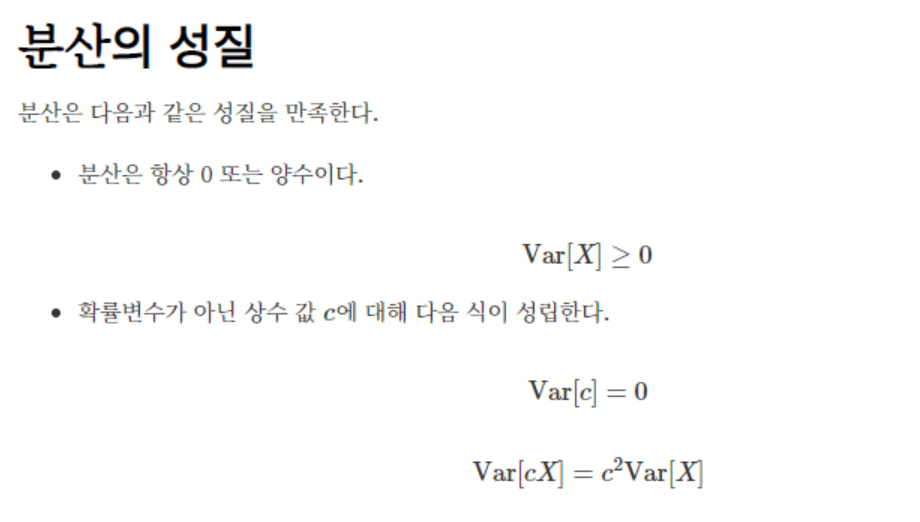

# 5.2 **2차원 이산형 확률변수**

## 5.2.1 **2차원 이산형 확률변수의 정의**

1차원 확률분포 2개를 동시에 다루는 변수 (X,Y)

우리 교재에서는 불공정한 주사위 2개를 사용하지만 여기서는 아래의 표를 봐주시길 바랍니다. 

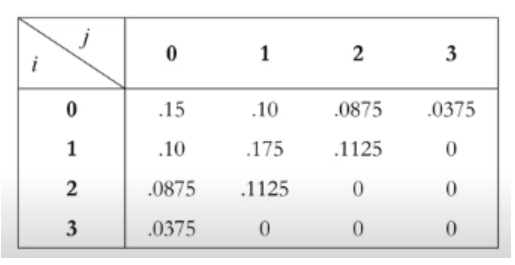

(X, Y) = {(i, j)|i=0, 1, 2, 3; j= 0, 1, 2, 3}

확률변수(X,Y)가 i, j를 취하는 확률 P

P = 결합확률함수

P(i, j) = P(i)*P(j)

  (p.130)

Joint Probability Distribution (결합확률분포)

"동시에" 







- 2차원 이산형 확률변수' 확률의 성질

  * P(i, j) >= 0
  * sum(P(i, j)) = 1 

In [27]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [28]:
def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [29]:
XY = [x_set, y_set, f_XY]

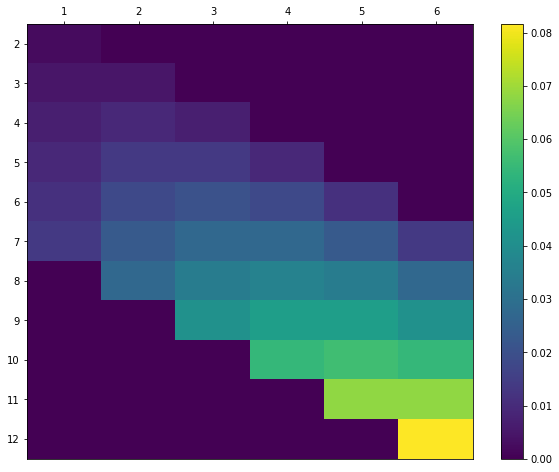

In [30]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축의 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [31]:
np.all(prob >= 0)

True

In [32]:
np.sum(prob)

1.0

- 주변확률분포

  * Marginal Probability Function(주변확률함수)
    
    결합확률분포에서 개별 확률변수에 관심.

    ex) X에 대해 궁금해, X 어떻게 움직이는지 궁금해.
      다른 조건들인 Y는 그대로 서 있고 X만 가봐.

      = X에 대한 주변확률 함수.

  * Marginal Probability Distribution(주변확률분포)


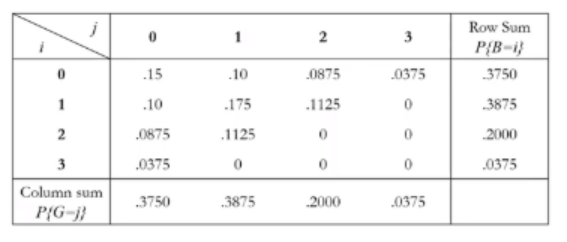

In [33]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [34]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [35]:
X = [x_set, f_X]
Y = [y_set, f_Y]

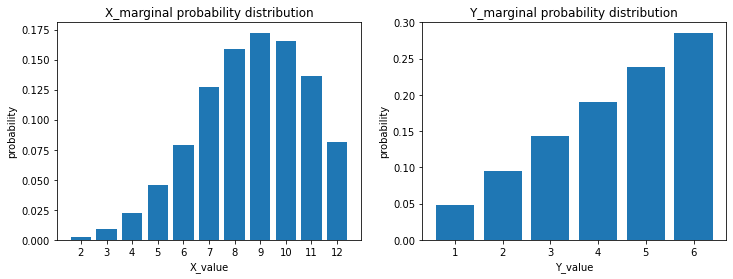

In [36]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

## 5.2.2 **2차원 이산형 확률변수의 지표**

- 기댓값 

In [37]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [38]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [39]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.666666666666666

In [40]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333333333333333

In [41]:
a, b = 2, 3

In [42]:
E(XY, lambda x, y: a*x + b*y)

30.333333333333332

In [43]:
a * mean_X + b * mean_Y

30.333333333333332

- 분산 

In [44]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

4.444444444444444

In [45]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [46]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444444444444444

In [47]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.2222222222222223

- 공분산

In [48]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [49]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

In [50]:
V(XY, lambda x, y: a*x + b*y)

64.44444444444444

In [51]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.44444444444443

- 상관계수

In [52]:
cov_xy / np.sqrt(var_X * var_Y)

0.7071067811865474